<a href="https://colab.research.google.com/github/adarshkumar8225/clustering/blob/master/cluster_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TITLE: OBJECT SEGMENTATION AND PLOTTING EACH OBJECT AS A SEPERATE IMAGE USING K-MEANS CLUSTERING**

---

# New Section

Important Links---.
https://www.kdnuggets.com/2019/08/introduction-image-segmentation-k-means-clustering.html
https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/

In [165]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


libraries for Elbow Method

In [166]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

**Read the image from the given path**
we can see the difference between original image and the image after imread() function.
original image is :


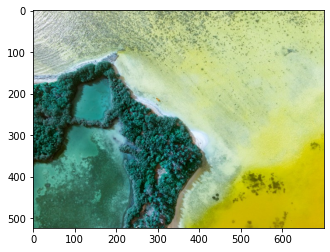

In [167]:
original_image=cv2.imread("/content/drive/MyDrive/1_NPWZVvTqyEBQr8rBmsbm2g.jpeg")
plt.imshow(original_image)
plt.show()

Now while reading quality degrades so bring back the normal image.
Here we can see the difference between two image.

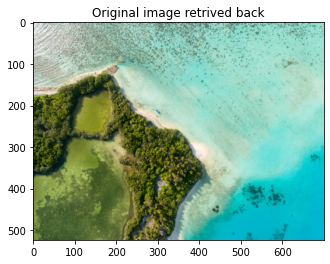

In [168]:
img=cv2.cvtColor(original_image,cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.title('Original image retrived back')
plt.show()

Store the pixel values in numpy array in the form of 2D array.
Also convert it fron unsigned int 8(uint8) to float32 **bold text**

In [169]:
vectorized=img.reshape((-1,3))
vectorized=np.float32(vectorized)
#print(vectorized)

**Trying to use Elbow method to obtain optimal K- value**

---



In [170]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
X=vectorized
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
 
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_

In [171]:
for key, val in mapping1.items():
    print(f'{key} : {val}')

1 : 104.73376457171197
2 : 57.87255644890039
3 : 41.47281426910037
4 : 34.53154542638027
5 : 29.989621863650388
6 : 26.768979461220535
7 : 23.91305662825855
8 : 22.476454618339826
9 : 21.436375583156934


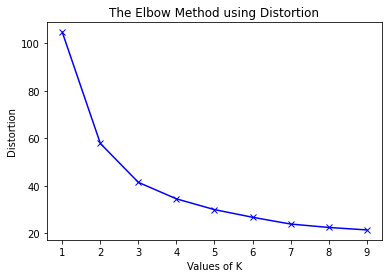

In [172]:
#k-plot based on distortion. Here i take avg of square sum of euclidean distance. 
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

In [173]:
for key, val in mapping2.items():
    print(f'{key} : {val}')

1 : 4676268032.0
2 : 1732631385.5660415
3 : 913797791.922853
4 : 578745154.8897209
5 : 439422728.18719757
6 : 361474761.4781774
7 : 288200625.4109423
8 : 251679642.11215955
9 : 228639105.05075026


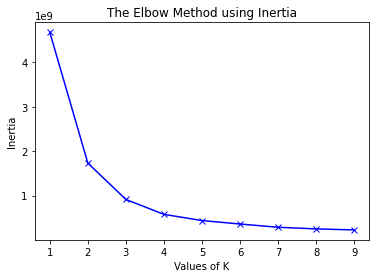

In [174]:
# K-plot based on Inertia here we take euclidean distance between centroid and points.
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

**Elbow methods for getting the optimal value of k is obtained here**

**Now run the K-Means clustering method for obtained value of K**

---



In [175]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 1000, 1.0)
K = 3
attempts=10
ret,label,center=cv2.kmeans(vectorized,K,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)

In [176]:
#this is done to regain the original image from numpy array
center = np.uint8(center)
res = center[label.flatten()]
result_image = res.reshape((img.shape))

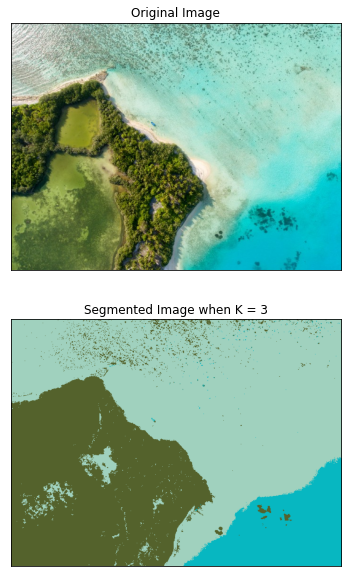

In [177]:
#plot original and segmented image
figure_size = 10
plt.figure(figsize=(figure_size,figure_size))
plt.subplot(2,1,1),plt.imshow(img)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(2,1,2),plt.imshow(result_image)
plt.title('Segmented Image when K = %i' % K), plt.xticks([]), plt.yticks([])
plt.show()

**Plot each cluster(object) seperately i.e. in seperate image**

---


Note: Each cluster contains one image so basically we net to print cluster one by one in seperate image.

Algorithm for exteracting each image of clusters:


*   Store the original image and call cvtColor() function to obtain the original image.

*   First store the pixel values of image in a numpy array in the form of 2D array where rows are no. of pixels and 3 columns corresponding to R G B.

*   Convert to float32 for further processing
*   for each cluster we have to go through all the pixels and compare it with cluster label of pixel in which it belongs


*   if current pixels belongs to the current cluster the it is part of current image so it will remain as it is and consider all other cluster as background.


*   finally in each iteration we will able to plot one cluster in an image.



Image belonging to cluster  1


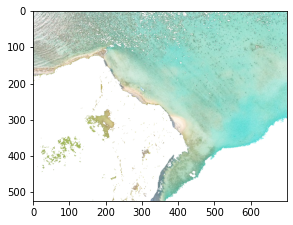

Image belonging to cluster  2


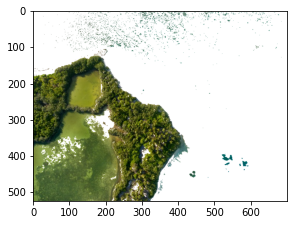

Image belonging to cluster  3


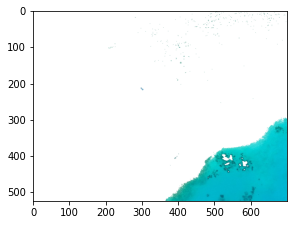

Segmented Image----->>>>>>>>>>>>>>>>


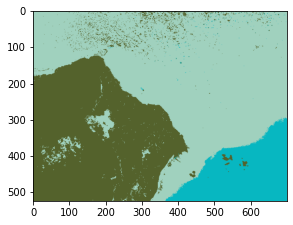

In [178]:
#the label tells that which pixel belong to which cluster
#Now seperate pixel of each labels

#Loop to print image belonging to each cluster
for i in range(0,K):
  current_img=img
  #This is done to get the exact original image
  current_img=cv2.cvtColor(current_img,cv2.COLOR_BGR2RGB)
  #store pixel values in 2-D numpy array of 3 column corresponding to RGB of each pixel
  v=current_img.reshape((-1,3))
  v=np.float32(v) #pixel values are converted into float
  #for each pixel check if it belongs to level i 
  for j in range(0,v.shape[0]):
    #if pixel's label is not equal to current cluster i.e. i then consider it as background
    #Because we have to print the image belonging to cluster i.
    if(i!=label[j][0]):
      v[j][0]=255
      v[j][1]=255 #RGB channel of pixel not belonging to current cluster is made 255 to get white
      v[j][2]=255
  v=np.uint8(v) #convert to regain the quality of image
  output_img = v.reshape((current_img.shape)) #bring back to the shape of image
  output_img=cv2.cvtColor(output_img,cv2.COLOR_BGR2RGB) #used to bring back the actual image of cluster

  #Now plot each cluster................................................
  print("Image belonging to cluster ",i+1)
  figure_size = 10
  plt.figure(figsize=(figure_size,figure_size))
  plt.subplot(2,K-1,i+1),plt.imshow(output_img)
  plt.show()

#plot the segmented image...........................  
print("Segmented Image----->>>>>>>>>>>>>>>>")
figure_size = 10
plt.figure(figsize=(figure_size,figure_size))
plt.subplot(2,K-1,K),plt.imshow(result_image)
plt.show()
